In [1]:
%matplotlib inline
from astropy.table import Table, join
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
mer = Table.read('/run/media/aalvarez/Astrodata/Work/Data/SC7/Pipelines/PS_DEV_PHZProduction_20200310-VALIDATION-nmorisse-PLAN-0001-2020-04-24-21-48-02-12/EUC_MER_FINAL-CAT_8BD1D7_20200424T080307.090421Z_00.00.fits')

In [3]:
for c in mer.colnames:
    if c not in ['OBJECT_ID', 'FLUX_U_EXT_LSST_APER', 'FLUX_VIS_APER', 'GAL_EBV']:
        del mer.columns[c]

In [4]:
phz = Table.read('/run/media/aalvarez/Astrodata/Work/Data/SC7/Pipelines/PS_DEV_PHZProduction_20200310-VALIDATION-nmorisse-PLAN-0001-2020-04-24-21-48-02-12/Reddening.fits', hdu=1)

In [5]:
phz_no = Table.read('/run/media/aalvarez/Astrodata/Work/Data/SC7/Pipelines/PS_DEV_PHZProduction_20200310-VALIDATION-nmorisse-PLAN-0001-2020-04-24-21-48-02-12/NoReddening.fits', hdu=1)

In [6]:
phz_mer = join(phz, mer, keys=['OBJECT_ID'])
phz_mer_no = join(phz_no, mer, keys=['OBJECT_ID'])

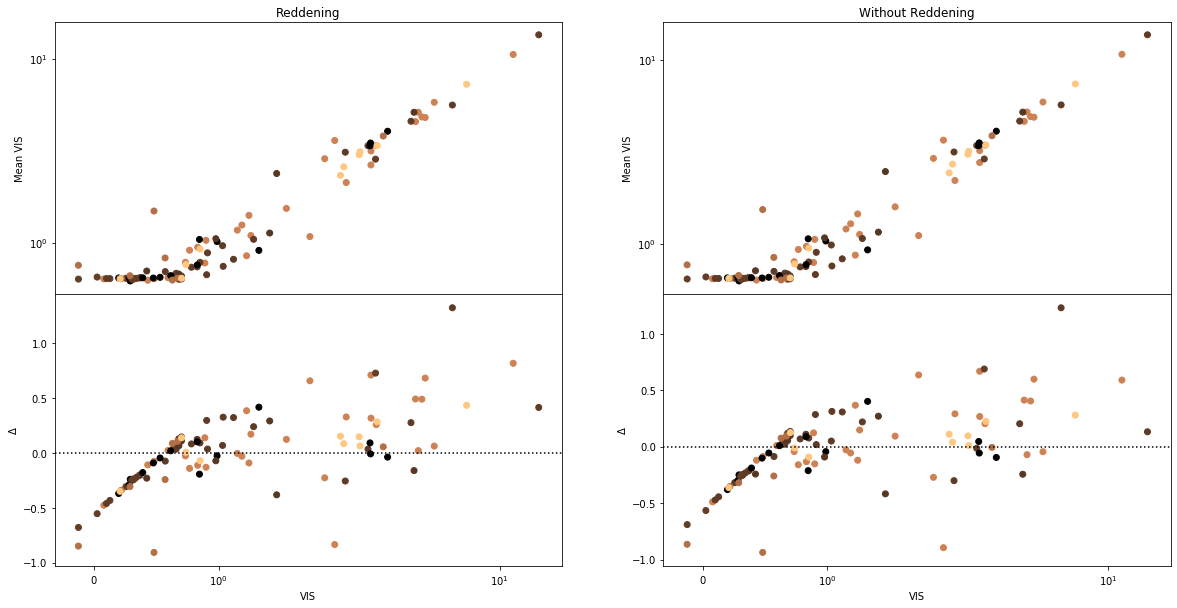

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.subplots_adjust(hspace=0)

for i, cat in enumerate([phz_mer, phz_mer_no]):
    l = axes[0, i].scatter(cat['FLUX_VIS_APER'], cat['VIS_MEAN'], c=cat['GAL_EBV'], cmap='copper')
    axes[0, i].set_ylabel('Mean VIS')
    axes[0, i].set_xscale('symlog')
    axes[0, i].set_yscale('symlog')
    
    axes[1, i].scatter(cat['FLUX_VIS_APER'], cat['FLUX_VIS_APER']-cat['VIS_MEAN'], c=cat['GAL_EBV'], cmap='copper')
    axes[1, i].set_xscale('symlog')
    axes[1, i].axhline(0, c='black', linestyle=':')
    axes[1, i].set_ylabel('$\Delta$')
    axes[1, i].set_xlabel('VIS')
    
axes[0, 0].set_title('Reddening')
axes[0, 1].set_title('Without Reddening')
plt.show()

In [10]:
out_filters = ['lsst_u','lsst_g', 'lsst_r', 'lsst_i', 'lsst_z', 'VIS', 'Y', 'J', 'H']

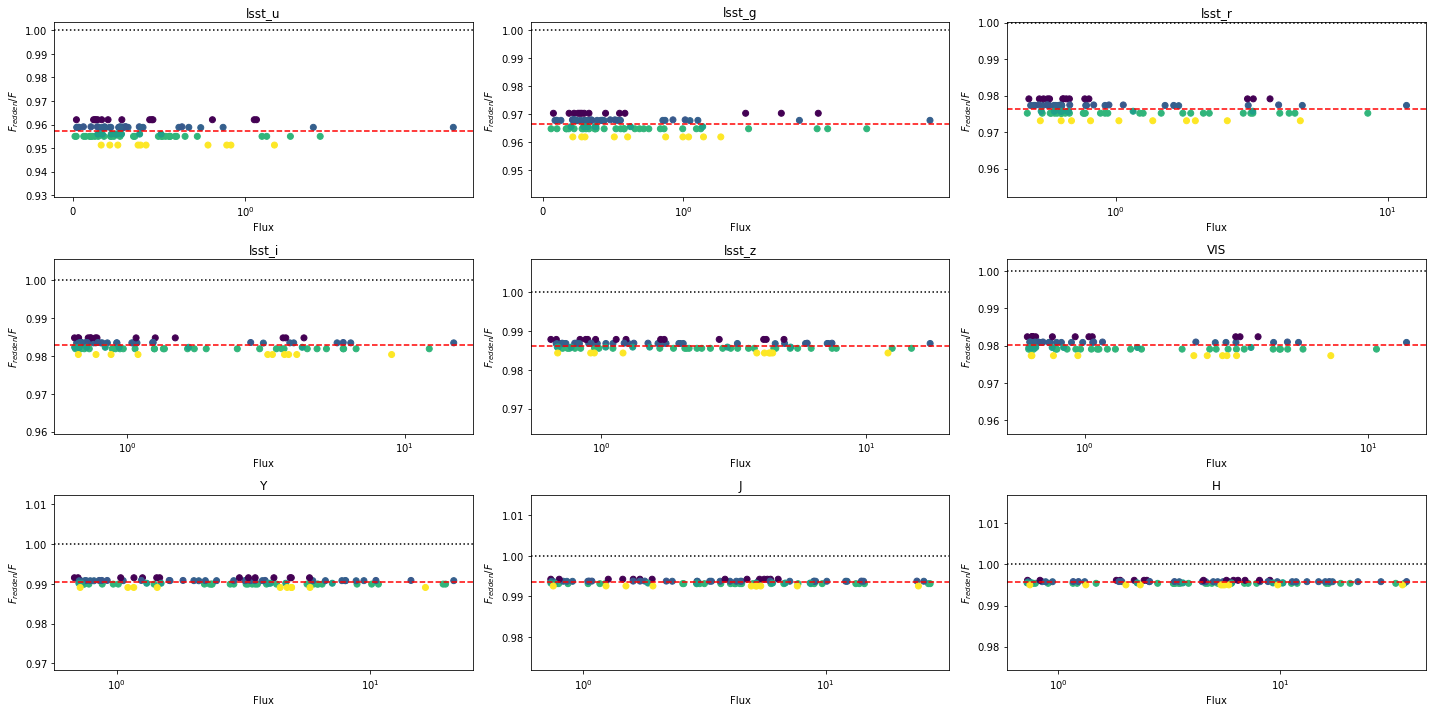

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=3)
axes = axes.ravel()
for i, f in enumerate(out_filters):
    ratio = phz_mer[f'{f}_MEAN']/phz_mer_no[f'{f}_MEAN']
    axes[i].scatter(phz_mer_no[f'{f}_MEAN'], ratio, c=phz_mer['GAL_EBV'])
    axes[i].axhline(1, linestyle=':', c='black')
    axes[i].axhline(np.average(ratio), linestyle='--', c='red')
    axes[i].set_xscale('symlog')
    axes[i].set_title(f)
    axes[i].set_xlabel('Flux')
    axes[i].set_ylabel('$F_{redden}/F$')
plt.tight_layout()